# <center> Finding a Solution to a Gap Equation </center>


Equation $(1)$ is a Gap equation. To solve for $m$, I will start by parameterizing the integral:

$$
\begin{align*}
    m \,&=\, 1 - \frac{6}{\pi^2}m\left(10\sqrt{10^2 + m^2} - m^2\ln{\frac{10 + \sqrt{10^2 + m^2}}{m}}\right) + \frac{12}{\pi^2}m\int_0^{10} dp\,\frac{p^2}{\sqrt{p^2 + m^2}}\left[ \frac{1}{e^{\left(\sqrt{p^2 + m^2} +1\right)} +1} + \frac{1}{e^{\left(\sqrt{p^2 + m^2} - 1\right)}+1} \right]  \tag{1} \\
    %%%%%%%%%
    &=\, 1 - \frac{6}{\pi^2}m\left(10\sqrt{10^2 + m^2} - m^2\ln{\frac{10 + \sqrt{10^2 + m^2}}{m}}\right) + \frac{12}{\pi^2}m\int_0^{10} I(p,m)\,dp  \tag{2} \\
    %%%%%%%%%
    &=\, 1 - \frac{6}{\pi^2}m\left(10\sqrt{10^2 + m^2} - m^2\ln{\frac{10 + \sqrt{10^2 + m^2}}{m}}\right) + \frac{12}{\pi^2}mA(m)  \tag{3}
\end{align*}
$$

<br>
where $A(m) \equiv \int_0^{10} I(p,m)\,dp$ and $I$ should be obvious. I start by substituting various discrete values for $m$ into $I(p,m)$ so that $A$ can be easily solvable; I then plot $A(m)$.

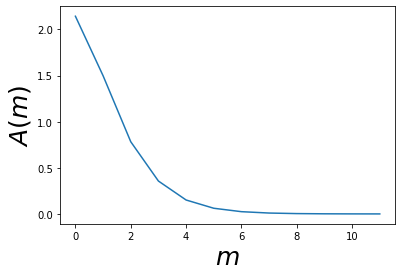

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A0 = 2.143392921709955      # A(m = 0) = 2.143392921709955
A1 = 1.49812910688557       # A(m = 1)
A2 = 0.7827657896827992     # m = 2
A3 = 0.3566181486331392 
A4 = 0.1511082918556652
A5 = 0.06158653500493273
A6 = 0.02453761298497387
A7 = 0.009631754308265933
A8 = 0.003739759757292826
A9 = 0.001439620578527362
A10 = 0.0005502607603987723
A11 = 0.0002090614014007566

A_arr = np.array([A0, A1, A2, A3, A4, A5, A6, A7, A8, A9, A10, A11])
m = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

plt.plot(A_arr)
plt.ylabel("$A(m)$", fontsize=25)
plt.xlabel("$m$", fontsize=25)
plt.show()

The plot resembles an exponential decay; so, I will fit Equation $(4)$ to the graph of $A(m)$.

$$ f(m) = \alpha e^{-m/\tau} + \beta \tag{4}$$

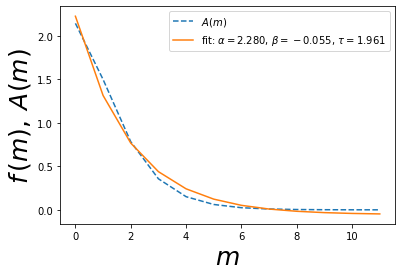

   𝛼 = 2.280154541546002278 ± 0.084283318403400059
   𝛽 = -0.055192404621545975 ± 0.041476585078953097
   𝜏 = 1.961290768380596017 ± 0.168626979398374122


In [2]:
from scipy.optimize import curve_fit

def f(m, α, β, τ):
    return α*np.exp(-m/τ) + β

plt.plot(m, A_arr, '--', label=r'$A(m)$')

popt, pcov = curve_fit(f, m, A_arr)
plt.plot(m, f(m, *popt), '-', label=r'fit: $\alpha=%5.3f,\, \beta=%5.3f,\, \tau=%5.3f$' % tuple(popt))


plt.ylabel("$f\,(m),\: A(m)$", fontsize=25)
plt.xlabel("$m$", fontsize=25)
plt.legend()
plt.show()


print('   𝛼 =', '%0.18f' % popt[0], '±', "%.18f" % pcov[0,0]**0.5) #2ND HALF IS FIT UNCERTAINTY
print('   𝛽 =', "%0.18f" % popt[1], '±', "%.18f" % pcov[1,1]**0.5)
print('   𝜏 =', "%0.18f" % popt[2], '±', "%.18f" % pcov[2,2]**0.5)

$$
\begin{align*}
    A(m) \,&\backsimeq\, f(m)   \tag{5} \\
    &\backsimeq\, 2.280\exp({-m\,/1.961}) - 0.055  \tag{6}
\end{align*}
$$

Now that $A$ has been approximated to the exponential decay function $(4)$, $f(m)$ can be substited into Equation $(3)$;

$$
\begin{align*}
    m \,\backsimeq\, 1 - \frac{6m}{\pi^2}\left(10\sqrt{10^2 + m^2} - m^2\ln{\frac{10 + \sqrt{10^2 + m^2}}{m}}\right) + \frac{27.36m}{\pi^2}e^{-m\,/1.961} - \frac{0.66m}{\pi^2}  \tag{7}
\end{align*}
$$

and so Equation $(7)$ can now be numerically solved with ease.

In [3]:
from scipy.optimize import fsolve

def g(m):
    return 1 - 6*m/np.pi**2 * (10*np.sqrt(10**2 + m**2) - m**2*np.log((10+np.sqrt(10**2 + m**20))/m)) + \
           ((27.36*m)/np.pi**2)*np.exp(-m/1.961) - ((0.66*m)/np.pi**2) - m

print(f"𝑚 = {fsolve(g, 0.01)[0]}")

𝑚 = 0.016917581734790365


Checking to see if $m = 0.016917581734790365$ is a correct root by substituting it back into Equation $(1)$:

In [4]:
m = 0.016917581734790365     # I(p,0.016917581734790365) = 2.142628587260748

1 - ((6*m)/np.pi**2)*(10*np.sqrt(10**2 + m**2) - m**2*np.log((10 + np.sqrt(10**2 + m**2))/m)) + ((12*m)/np.pi**2)*2.142628587260748 - m

-0.0012914733890761788

Very close to zero, even when only $12$ data points have been used for the curve fit and the uncertainty analysis has not been taken into consideration. $m = 0.016917581734790365$ *is* a correct root.